In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import os
import sounddevice as sd
from IPython.display import Audio

In [2]:
ipd.Audio("./audios/Record (online-voice-recorder.com) (10).mp3")

In [3]:
data, sr = librosa.load("./audios/Record (online-voice-recorder.com) (10).mp3")

In [4]:
data

array([ 2.6227165e-19, -2.2352780e-19,  6.4591546e-19, ...,
       -7.1602012e-04, -3.5393937e-04, -4.0040613e-04], dtype=float32)

In [5]:
len(data)

121716

In [6]:
audio_files = os.listdir("audios")
audio_files

['Record (online-voice-recorder.com) (1).mp3',
 'Record (online-voice-recorder.com) (10).mp3',
 'Record (online-voice-recorder.com) (2).mp3',
 'Record (online-voice-recorder.com) (3).mp3',
 'Record (online-voice-recorder.com) (4).mp3',
 'Record (online-voice-recorder.com) (5).mp3',
 'Record (online-voice-recorder.com) (6).mp3',
 'Record (online-voice-recorder.com) (7).mp3',
 'Record (online-voice-recorder.com) (8).mp3',
 'Record (online-voice-recorder.com) (9).mp3',
 'sardor_mfcc0.txt',
 'sardor_mfcc1.txt',
 'sardor_mfcc2.txt']

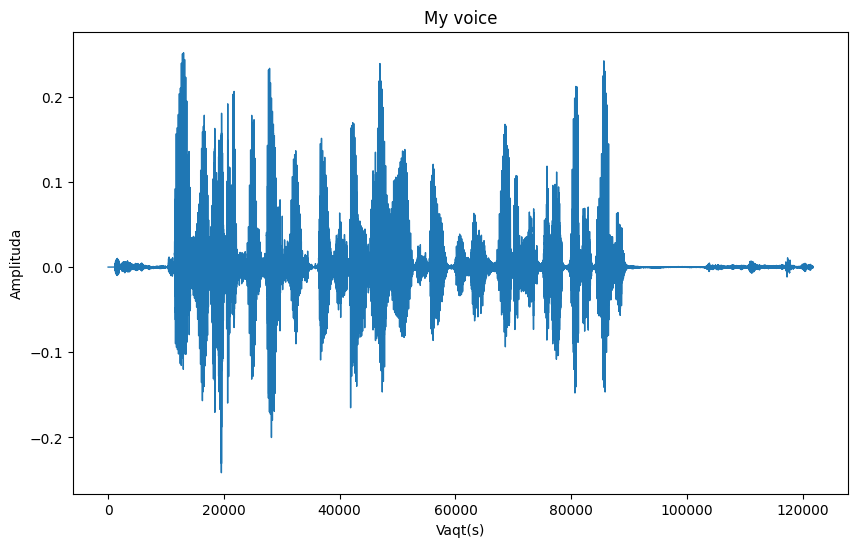

In [7]:
pd.Series(data).plot(figsize=(10,6),
                     lw=1,
                     title="My voice",)
plt.xlabel("Vaqt(s)")
plt.ylabel("Amplituda")
plt.show()

In [8]:
melspec = librosa.feature.melspectrogram(y=data,sr=sr)
melspec

array([[5.3234023e-18, 5.1267932e-08, 9.6629929e-06, ..., 1.1810736e-06,
        9.3625504e-06, 4.8869802e-05],
       [4.5508739e-18, 7.0242045e-08, 4.4813323e-06, ..., 1.9414885e-05,
        1.7128914e-05, 2.2123830e-05],
       [4.3897487e-18, 1.5610820e-07, 4.5183665e-06, ..., 6.1931794e-05,
        1.0380591e-04, 7.0387730e-05],
       ...,
       [4.8055296e-19, 1.2979448e-08, 4.1746324e-07, ..., 2.3189364e-06,
        1.5240881e-06, 1.1716265e-06],
       [2.8001540e-18, 2.6715261e-09, 1.7653986e-07, ..., 1.2819769e-06,
        9.6204712e-07, 1.0577421e-06],
       [1.1245968e-18, 3.0949693e-10, 1.6185595e-08, ..., 6.0714790e-08,
        5.7226430e-08, 7.6174103e-08]], dtype=float32)

In [9]:
log_s = librosa.amplitude_to_db(melspec)
log_s

array([[-47.283226, -47.283226, -47.283226, ..., -47.283226, -47.283226,
        -47.283226],
       [-47.283226, -47.283226, -47.283226, ..., -47.283226, -47.283226,
        -47.283226],
       [-47.283226, -47.283226, -47.283226, ..., -47.283226, -47.283226,
        -47.283226],
       ...,
       [-47.283226, -47.283226, -47.283226, ..., -47.283226, -47.283226,
        -47.283226],
       [-47.283226, -47.283226, -47.283226, ..., -47.283226, -47.283226,
        -47.283226],
       [-47.283226, -47.283226, -47.283226, ..., -47.283226, -47.283226,
        -47.283226]], dtype=float32)

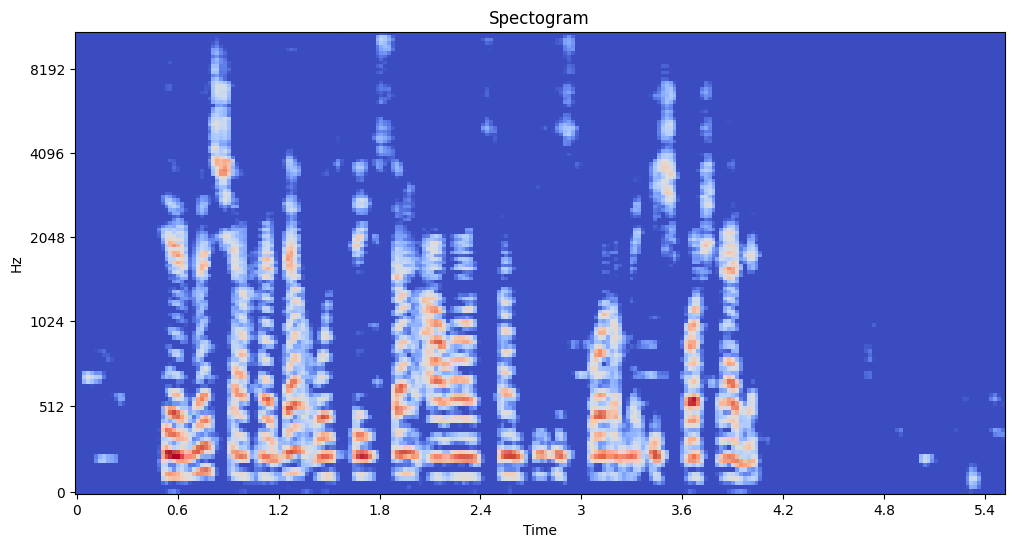

In [10]:
plt.figure(figsize=(12,6))
librosa.display.specshow(log_s,sr=sr,x_axis='time',y_axis='mel')
plt.title("Spectogram")
plt.show()

In [11]:
# Ovoz faylini yuklash
audio_file = "./audios/Record (online-voice-recorder.com) (10).mp3"

# Ovozni yuklash va xossalarini hisoblash
signal, sr = librosa.load(audio_file)

# Ovozning shoqindan tozalash miqdori (decibels)
noisiness = librosa.effects.split(signal, top_db=20)

# Ovozni tozalab chiqish
audio_without_silence = librosa.effects.remix(signal, intervals=noisiness)

# Tozalangan ovozni eshitish
Audio(audio_without_silence, rate=sr)

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pyaudio
import wave
#audio signalni yozib olish
for i in range(10):
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 44100
    CHUNK = 1024
    RECORD_SECONDS = 5
    WAVE_OUTPUT_FILENAME = f"sardor/sardor{i}.wav"
    audio = pyaudio.PyAudio()
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)
    print("yozilmoqda...")
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print("Recording finished...")
    stream.stop_stream()
    stream.close()
    audio.terminate()
    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    res = input("Yana ovoz yozishni xohlaysizmi?(Yes/No)")
    if res == "No":
        break

yozilmoqda...
Recording finished...


In [14]:
audio_files = os.listdir("./sardor/")
n = len(audio_files)
for i in range(n):
    audio_path = f'sardor/sardor{i}.wav'
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    df = pd.DataFrame(mfccs)
    df.to_csv(f"mfcc/sardor_mfcc{i}.csv")

In [17]:
import librosa
import numpy as np

def audio_segmentation(audio_file, segment_length=5, overlap=0.5):
    # Audio faylni yuklash
    y, sr = librosa.load(audio_file, sr=None)
    
    # Segment uzunligi (sekund)
    segment_length_samples = int(segment_length * sr)
    
    # Segmentlar orasidagi qadam
    step = int(segment_length_samples * (1 - overlap))
    
    # Audio ni segmentlarga bo'lib ajratish
    segments = []
    for i in range(0, len(y) - segment_length_samples, step):
        segment = y[i:i + segment_length_samples]
        segments.append(segment)
    
    return segments, sr

def audio_to_spectrogram(audio_file, segment_length=5, overlap=0.5):
    segments, sr = audio_segmentation(audio_file, segment_length, overlap)
    spectrograms = []
    for segment in segments:
        # Freymlovka qilish
        S = np.abs(librosa.stft(segment))
        spectrograms.append(S)
    return spectrograms, sr

# Ovozli faylning nomi
input_audio = './audios/Record (online-voice-recorder.com) (4).mp3'

# Segment uzunligi (sekund)
segment_length = 5

# Qadam (overlap)
overlap = 0.5

# Spectrogramlarni olish
spectrograms, sr = audio_to_spectrogram(input_audio, segment_length, overlap)

print("Spectrogramlar muvaffaqiyatli olingan!")

Spectrogramlar muvaffaqiyatli olingan!


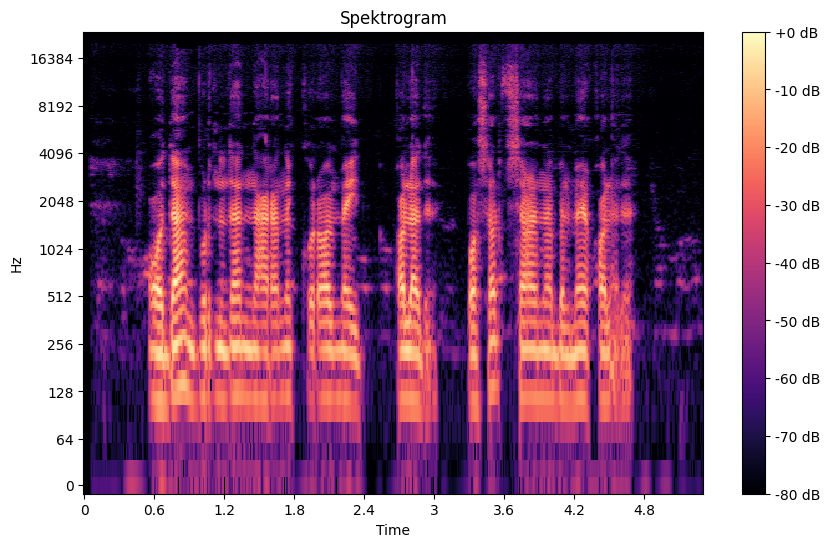

In [19]:
y, sr = librosa.load(input_audio, sr=None)

# Spektrogramni hisoblash
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Spektrogramni tasvirlash
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram')
plt.show()

In [16]:
import numpy as np

def calculate_energy(spectrogram):
    # Spektrogramning karralari
    magnitudes = np.abs(spectrogram)
    
    # Energia hisoblanishi
    energy = np.sum(magnitudes**2)
    
    return energy

def audio_energy(audio_file, segment_length=5, overlap=0.5):
    # Spektrogramlarni olish
    spectrograms, _ = audio_to_spectrogram(audio_file, segment_length, overlap)
    
    # Segmentlarning energiyalarini hisoblash
    energies = []
    for spectrogram in spectrograms:
        energy = calculate_energy(spectrogram)
        energies.append(energy)
    
    return energies

# Ovozli faylning nomi
input_audio = './audios/Record (online-voice-recorder.com) (4).mp3'

# Segment uzunligi (sekund)
segment_length = 5

# Qadam (overlap)
overlap = 0.5

# Energialarni hisoblash
energies = audio_energy(input_audio, segment_length, overlap)

# Energialarni chiqarish
for i, energy in enumerate(energies):
    print(f"Segment {i+1}: Energy = {energy}")

print("Energialar muvaffaqiyatli hisoblandi!")

Segment 1: Energy = 427720.65625
Energialar muvaffaqiyatli hisoblandi!
